Importing all the dependencies

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# train_test_split - function that splits data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Load data

In [2]:
# load data
raw_X = pd.read_csv('../datasets/hourly_wages_data.csv')
raw_Y = raw_X.pop('female')

Applying scaling

In [3]:
scaler = StandardScaler()
scaler.fit(raw_X)

raw_X = scaler.transform(raw_X)

Applying transforming to `one-hot encoded`

In [4]:
raw_Y = tf.keras.utils.to_categorical(raw_Y)

Split data

In [5]:
# split data for train and test+val (0.1 + 0.2)
train_X, test_and_val_X, train_Y, test_and_val_Y = train_test_split(raw_X, raw_Y, test_size=0.3, random_state=1000)

# split data for test and val (0.2/0.3)
test_X, val_X, test_Y, val_Y = train_test_split(test_and_val_X, test_and_val_Y, test_size=0.66, random_state=1000)

Setup model

In [6]:
# setup model
model = tf.keras.Sequential()

n_cols = train_X.shape[1]

Define function for showing plot

In [7]:
def show_plot(history):
    plt.title("Model loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.plot(history.history['loss'], color='green')
    plt.plot(history.history['val_loss'], color='red')
    plt.legend(['Loss', 'Val loss'])
    plt.show()

Compile model with `adam` optimizer

In [8]:
# add layers
model.add(tf.keras.layers.Dense(50, activation='relu', input_shape=(n_cols,)))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy')

Print `adam`'s plot

In [9]:
history = model.fit(train_X, train_Y, validation_split=0.2, epochs=150)

Epoch 1/150
 1/10 [==>...........................] - ETA: 1s - loss: 0.6902

2022-10-27 14:51:34.630771: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


10/10 [==============================] - 0s 9ms/step - loss: 0.6966 - val_loss: 0.6601
Epoch 2/150
10/10 [==============================] - 0s 2ms/step - loss: 0.6646 - val_loss: 0.6444
Epoch 3/150
10/10 [==============================] - 0s 2ms/step - loss: 0.6507 - val_loss: 0.6307
Epoch 4/150
10/10 [==============================] - 0s 2ms/step - loss: 0.6354 - val_loss: 0.6160
Epoch 5/150
10/10 [==============================] - 0s 2ms/step - loss: 0.6273 - val_loss: 0.6143
Epoch 6/150
10/10 [==============================] - 0s 2ms/step - loss: 0.6184 - val_loss: 0.6130
Epoch 7/150
10/10 [==============================] - 0s 2ms/step - loss: 0.6115 - val_loss: 0.6105
Epoch 8/150
10/10 [==============================] - 0s 2ms/step - loss: 0.6061 - val_loss: 0.6065
Epoch 9/150
10/10 [==============================] - 0s 2ms/step - loss: 0.5995 - val_loss: 0.6104
Epoch 10/150
10/10 [==============================] - 0s 2ms/step - loss: 0.5959 - val_loss: 0.6110
Epoch 11/150
10/10 [=

10/10 [==============================] - 0s 2ms/step - loss: 0.4125 - val_loss: 0.6301
Epoch 84/150
10/10 [==============================] - 0s 2ms/step - loss: 0.4095 - val_loss: 0.6198
Epoch 85/150
10/10 [==============================] - 0s 2ms/step - loss: 0.4090 - val_loss: 0.6271
Epoch 86/150
10/10 [==============================] - 0s 2ms/step - loss: 0.4063 - val_loss: 0.6179
Epoch 87/150
10/10 [==============================] - 0s 2ms/step - loss: 0.3993 - val_loss: 0.6110
Epoch 88/150
10/10 [==============================] - 0s 2ms/step - loss: 0.4015 - val_loss: 0.6143
Epoch 89/150
10/10 [==============================] - 0s 2ms/step - loss: 0.3970 - val_loss: 0.6343
Epoch 90/150
10/10 [==============================] - 0s 2ms/step - loss: 0.3989 - val_loss: 0.6274
Epoch 91/150
10/10 [==============================] - 0s 2ms/step - loss: 0.3959 - val_loss: 0.6152
Epoch 92/150
10/10 [==============================] - 0s 2ms/step - loss: 0.3949 - val_loss: 0.6250
Epoch 93/150


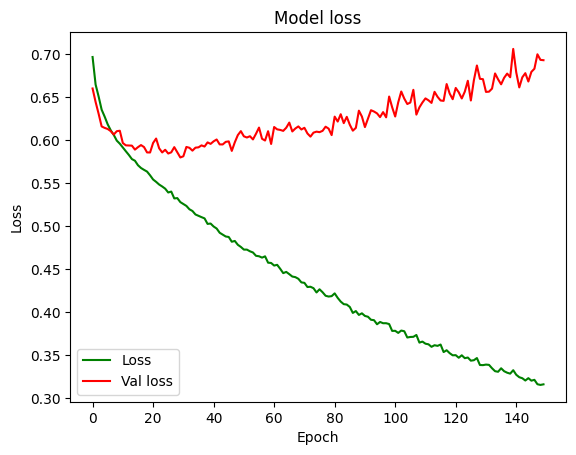

In [10]:
show_plot(history)

Compile model with `adadelta` optimizer

In [11]:
# setup model
model = tf.keras.Sequential()

# add layers
model.add(tf.keras.layers.Dense(50, activation='relu', input_shape=(n_cols,)))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# compile
model.compile(optimizer=tf.keras.optimizers.Adadelta(
    learning_rate=0.1
), loss='mean_squared_error')

Print `adadelta`'s plot

In [12]:
history = model.fit(train_X, train_Y, validation_split=0.2, epochs=150)

Epoch 1/150
10/10 [==============================] - 0s 6ms/step - loss: 0.2648 - val_loss: 0.2639
Epoch 2/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2607 - val_loss: 0.2595
Epoch 3/150
10/10 [==============================] - 0s 3ms/step - loss: 0.2574 - val_loss: 0.2557
Epoch 4/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2545 - val_loss: 0.2520
Epoch 5/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2517 - val_loss: 0.2493
Epoch 6/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2495 - val_loss: 0.2458
Epoch 7/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2472 - val_loss: 0.2430
Epoch 8/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2452 - val_loss: 0.2406
Epoch 9/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2435 - val_loss: 0.2383
Epoch 10/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2420 - val_loss: 0.2367
Epoch 11/

10/10 [==============================] - 0s 2ms/step - loss: 0.2099 - val_loss: 0.2140
Epoch 84/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2098 - val_loss: 0.2140
Epoch 85/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2095 - val_loss: 0.2138
Epoch 86/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2094 - val_loss: 0.2138
Epoch 87/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2092 - val_loss: 0.2139
Epoch 88/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2090 - val_loss: 0.2139
Epoch 89/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2088 - val_loss: 0.2139
Epoch 90/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2086 - val_loss: 0.2139
Epoch 91/150
10/10 [==============================] - 0s 3ms/step - loss: 0.2085 - val_loss: 0.2140
Epoch 92/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2083 - val_loss: 0.2143
Epoch 93/150


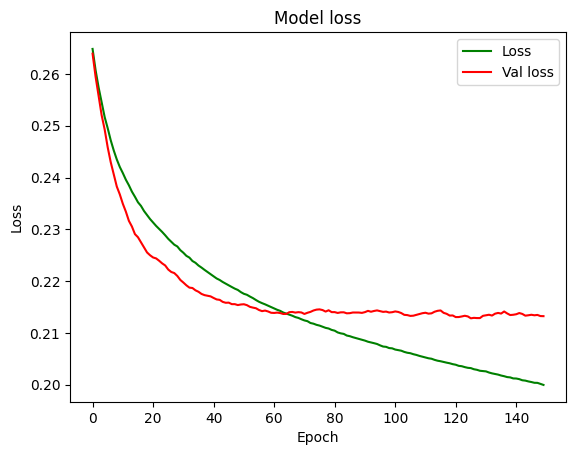

In [13]:
show_plot(history)

Compile model with `adagrad` optimizer

In [14]:
# setup model
model = tf.keras.Sequential()

# add layers
model.add(tf.keras.layers.Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# compile
model.compile(optimizer=tf.keras.optimizers.Adagrad(
    learning_rate=0.01
), loss='mean_squared_error')

Print `adagrad`'s plot

In [15]:
history = model.fit(train_X, train_Y, validation_split=0.2, epochs=150)

Epoch 1/150
10/10 [==============================] - 0s 15ms/step - loss: 0.2751 - val_loss: 0.2431
Epoch 2/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2657 - val_loss: 0.2365
Epoch 3/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2597 - val_loss: 0.2321
Epoch 4/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2552 - val_loss: 0.2281
Epoch 5/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2513 - val_loss: 0.2256
Epoch 6/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2485 - val_loss: 0.2234
Epoch 7/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2458 - val_loss: 0.2219
Epoch 8/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2439 - val_loss: 0.2205
Epoch 9/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2423 - val_loss: 0.2198
Epoch 10/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2410 - val_loss: 0.2189
Epoch 11

10/10 [==============================] - 0s 2ms/step - loss: 0.2169 - val_loss: 0.2114
Epoch 84/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2166 - val_loss: 0.2115
Epoch 85/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2165 - val_loss: 0.2113
Epoch 86/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2164 - val_loss: 0.2112
Epoch 87/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2163 - val_loss: 0.2111
Epoch 88/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2161 - val_loss: 0.2111
Epoch 89/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2160 - val_loss: 0.2110
Epoch 90/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2158 - val_loss: 0.2108
Epoch 91/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2157 - val_loss: 0.2106
Epoch 92/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2156 - val_loss: 0.2104
Epoch 93/150


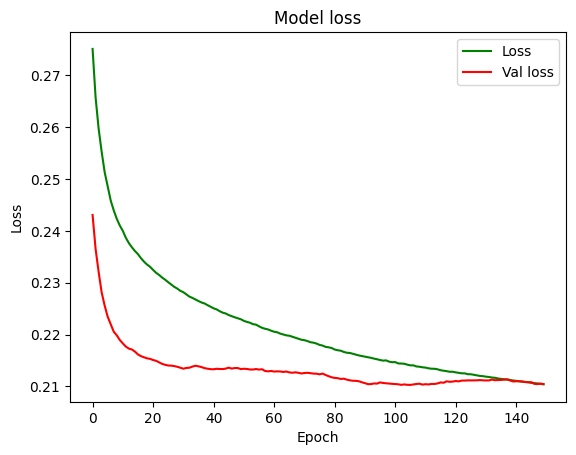

In [16]:
show_plot(history)

Compile model with `adamax` optimizer

In [17]:
# setup model
model = tf.keras.Sequential()

# add layers
model.add(tf.keras.layers.Dense(250, activation='relu', input_shape=(n_cols,)))
model.add(tf.keras.layers.Dense(250, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# compile
model.compile(optimizer=tf.keras.optimizers.Adamax(
    learning_rate=0.001
), loss='mean_squared_error')

Print `adamax`'s plot

In [18]:
history = model.fit(train_X, train_Y, validation_split=0.2, epochs=30)

Epoch 1/30
10/10 [==============================] - 0s 6ms/step - loss: 0.2410 - val_loss: 0.2183
Epoch 2/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2175 - val_loss: 0.2165
Epoch 3/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2124 - val_loss: 0.2165
Epoch 4/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2060 - val_loss: 0.2102
Epoch 5/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2032 - val_loss: 0.2103
Epoch 6/30
10/10 [==============================] - 0s 2ms/step - loss: 0.1999 - val_loss: 0.2109
Epoch 7/30
10/10 [==============================] - 0s 2ms/step - loss: 0.1969 - val_loss: 0.2101
Epoch 8/30
10/10 [==============================] - 0s 2ms/step - loss: 0.1949 - val_loss: 0.2118
Epoch 9/30
10/10 [==============================] - 0s 2ms/step - loss: 0.1925 - val_loss: 0.2095
Epoch 10/30
10/10 [==============================] - 0s 3ms/step - loss: 0.1900 - val_loss: 0.2098
Epoch 11/30
10/10 [

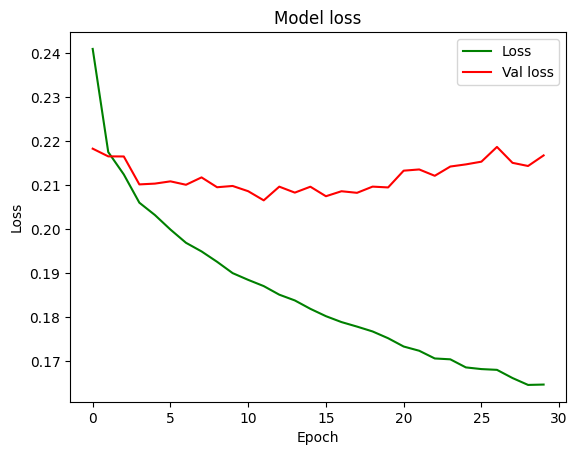

In [19]:
show_plot(history)

Compile model with `nadam` optimizer

In [20]:
# setup model
model = tf.keras.Sequential()

# add layers
model.add(tf.keras.layers.Dense(50, activation='relu', input_shape=(n_cols,)))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# compile
model.compile(optimizer=tf.keras.optimizers.Nadam(
    learning_rate=0.0001
), loss='mean_absolute_error')

Print `nadam`'s plot

In [21]:
history = model.fit(train_X, train_Y, validation_split=0.2, epochs=500)

Epoch 1/500
10/10 [==============================] - 0s 5ms/step - loss: 0.4974 - val_loss: 0.5017
Epoch 2/500
10/10 [==============================] - 0s 1ms/step - loss: 0.4948 - val_loss: 0.4989
Epoch 3/500
10/10 [==============================] - 0s 1ms/step - loss: 0.4918 - val_loss: 0.4960
Epoch 4/500
10/10 [==============================] - 0s 1ms/step - loss: 0.4888 - val_loss: 0.4932
Epoch 5/500
10/10 [==============================] - 0s 1ms/step - loss: 0.4858 - val_loss: 0.4905
Epoch 6/500
10/10 [==============================] - 0s 1ms/step - loss: 0.4831 - val_loss: 0.4881
Epoch 7/500
10/10 [==============================] - 0s 2ms/step - loss: 0.4807 - val_loss: 0.4856
Epoch 8/500
10/10 [==============================] - 0s 1ms/step - loss: 0.4783 - val_loss: 0.4831
Epoch 9/500
10/10 [==============================] - 0s 1ms/step - loss: 0.4757 - val_loss: 0.4809
Epoch 10/500
10/10 [==============================] - 0s 1ms/step - loss: 0.4734 - val_loss: 0.4787
Epoch 11/

10/10 [==============================] - 0s 1ms/step - loss: 0.3837 - val_loss: 0.4068
Epoch 84/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3831 - val_loss: 0.4065
Epoch 85/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3824 - val_loss: 0.4062
Epoch 86/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3817 - val_loss: 0.4058
Epoch 87/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3811 - val_loss: 0.4052
Epoch 88/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3805 - val_loss: 0.4047
Epoch 89/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3799 - val_loss: 0.4044
Epoch 90/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3792 - val_loss: 0.4042
Epoch 91/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3786 - val_loss: 0.4042
Epoch 92/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3781 - val_loss: 0.4040
Epoch 93/500


10/10 [==============================] - 0s 1ms/step - loss: 0.3499 - val_loss: 0.3921
Epoch 165/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3497 - val_loss: 0.3922
Epoch 166/500
10/10 [==============================] - 0s 2ms/step - loss: 0.3494 - val_loss: 0.3923
Epoch 167/500
10/10 [==============================] - 0s 2ms/step - loss: 0.3492 - val_loss: 0.3925
Epoch 168/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3489 - val_loss: 0.3924
Epoch 169/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3487 - val_loss: 0.3923
Epoch 170/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3483 - val_loss: 0.3923
Epoch 171/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3480 - val_loss: 0.3921
Epoch 172/500
10/10 [==============================] - 0s 2ms/step - loss: 0.3478 - val_loss: 0.3919
Epoch 173/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3475 - val_loss: 0.3918
Epoc

10/10 [==============================] - 0s 1ms/step - loss: 0.3300 - val_loss: 0.3800
Epoch 246/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3298 - val_loss: 0.3800
Epoch 247/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3295 - val_loss: 0.3798
Epoch 248/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3293 - val_loss: 0.3796
Epoch 249/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3292 - val_loss: 0.3794
Epoch 250/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3289 - val_loss: 0.3791
Epoch 251/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3287 - val_loss: 0.3787
Epoch 252/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3285 - val_loss: 0.3786
Epoch 253/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3282 - val_loss: 0.3785
Epoch 254/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3279 - val_loss: 0.3784
Epoc

10/10 [==============================] - 0s 1ms/step - loss: 0.3114 - val_loss: 0.3722
Epoch 327/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3112 - val_loss: 0.3722
Epoch 328/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3110 - val_loss: 0.3721
Epoch 329/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3108 - val_loss: 0.3722
Epoch 330/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3106 - val_loss: 0.3720
Epoch 331/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3104 - val_loss: 0.3717
Epoch 332/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3102 - val_loss: 0.3712
Epoch 333/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3099 - val_loss: 0.3709
Epoch 334/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3098 - val_loss: 0.3706
Epoch 335/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3096 - val_loss: 0.3706
Epoc

10/10 [==============================] - 0s 1ms/step - loss: 0.2965 - val_loss: 0.3668
Epoch 408/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2963 - val_loss: 0.3667
Epoch 409/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2962 - val_loss: 0.3666
Epoch 410/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2961 - val_loss: 0.3665
Epoch 411/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2958 - val_loss: 0.3664
Epoch 412/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2957 - val_loss: 0.3664
Epoch 413/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2955 - val_loss: 0.3666
Epoch 414/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2954 - val_loss: 0.3666
Epoch 415/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2953 - val_loss: 0.3666
Epoch 416/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2951 - val_loss: 0.3666
Epoc

10/10 [==============================] - 0s 1ms/step - loss: 0.2852 - val_loss: 0.3641
Epoch 489/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2850 - val_loss: 0.3643
Epoch 490/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2849 - val_loss: 0.3643
Epoch 491/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2848 - val_loss: 0.3644
Epoch 492/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2847 - val_loss: 0.3644
Epoch 493/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2846 - val_loss: 0.3644
Epoch 494/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2844 - val_loss: 0.3645
Epoch 495/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2843 - val_loss: 0.3643
Epoch 496/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2842 - val_loss: 0.3641
Epoch 497/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2841 - val_loss: 0.3639
Epoc

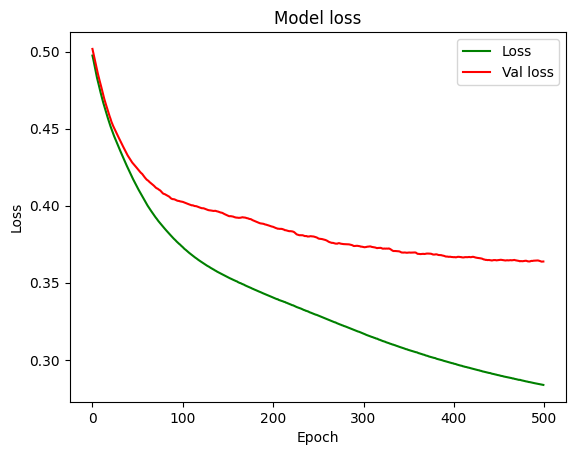

In [22]:
show_plot(history)

Compile model with `sgd` optimizer

In [23]:
# setup model
model = tf.keras.Sequential()

# add layers
model.add(tf.keras.layers.Dense(200, activation='relu', input_shape=(n_cols,)))
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# compile
model.compile(optimizer=tf.keras.optimizers.SGD(
    learning_rate=0.01
), loss='mean_squared_error')


Print `sgd`'s plot

In [24]:
history = model.fit(train_X, train_Y, validation_split=0.2, epochs=150)

Epoch 1/150
10/10 [==============================] - 0s 5ms/step - loss: 0.2488 - val_loss: 0.2401
Epoch 2/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2473 - val_loss: 0.2394
Epoch 3/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2459 - val_loss: 0.2381
Epoch 4/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2446 - val_loss: 0.2372
Epoch 5/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2433 - val_loss: 0.2362
Epoch 6/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2423 - val_loss: 0.2356
Epoch 7/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2411 - val_loss: 0.2345
Epoch 8/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2402 - val_loss: 0.2336
Epoch 9/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2392 - val_loss: 0.2328
Epoch 10/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2380 - val_loss: 0.2321
Epoch 11/

10/10 [==============================] - 0s 1ms/step - loss: 0.2093 - val_loss: 0.2175
Epoch 84/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2091 - val_loss: 0.2173
Epoch 85/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2089 - val_loss: 0.2172
Epoch 86/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2087 - val_loss: 0.2169
Epoch 87/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2085 - val_loss: 0.2172
Epoch 88/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2084 - val_loss: 0.2171
Epoch 89/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2082 - val_loss: 0.2168
Epoch 90/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2080 - val_loss: 0.2164
Epoch 91/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2077 - val_loss: 0.2164
Epoch 92/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2076 - val_loss: 0.2165
Epoch 93/150


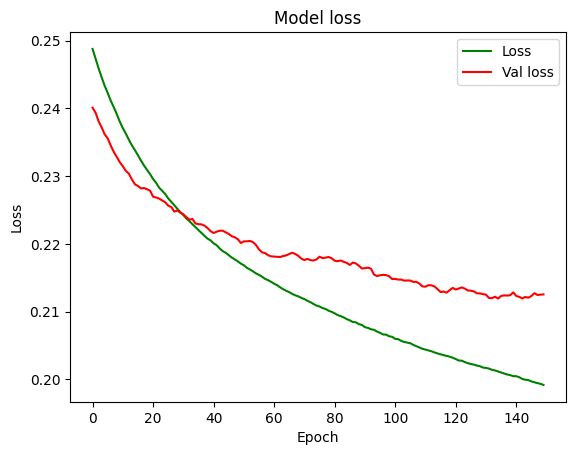

In [25]:
show_plot(history)
